In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import nbformat

In [10]:
batters = pd.read_csv('improved_batter_elo_ratings_park_factored1.csv')
pitchers = pd.read_csv('improved_pitcher_elo_ratings_park_factored1.csv')

batters["ELO+"] = batters['elo+2'].round()
pitchers["ELO+"] = pitchers['elo+2'].round()

batters_q = batters[batters['is_qualified'] == True]
pitchers_q = pitchers[pitchers['is_qualified'] == True]

In [22]:
batterssorted = batters.sort_values('ELO+', ascending=False)
batterssorted.head(5)

,player_id,elo,count,MLBID,MLBNAME,TEAM,FANGRAPHSNAME,Name,PA,WRC+,is_qualified,elo_adjusted,elo+,elo_adjusted2,elo+2,elo+_wrc,ELO+
0,687462,1519.364867,411,687462,Spencer Horwitz,PIT,Spencer Horwitz,Spencer Horwitz,411,119,False,1519.364867,105.775948,203.988538,168.553724,207.501231,169.0
2,592450,1515.394488,679,592450,Aaron Judge,NYY,Aaron Judge,Aaron Judge,679,204,True,1515.394488,105.499537,200.018159,165.273039,203.795821,165.0
1,647304,1515.613268,605,647304,Josh Naylor,SEA,Josh Naylor,Josh Naylor,604,128,True,1515.613268,105.514768,200.236939,165.453815,204.000000,165.0
3,668800,1512.541326,88,668800,Andrew Knizner,SF,Andrew Knizner,Andrew Knizner,88,73,False,1512.541326,105.300904,197.164997,162.915500,201.133069,163.0
4,672012,1510.577448,13,672012,Tyler Black,MIL,Tyler Black,Tyler Black,13,181,False,1510.577448,105.164181,195.201119,161.292766,199.300253,161.0


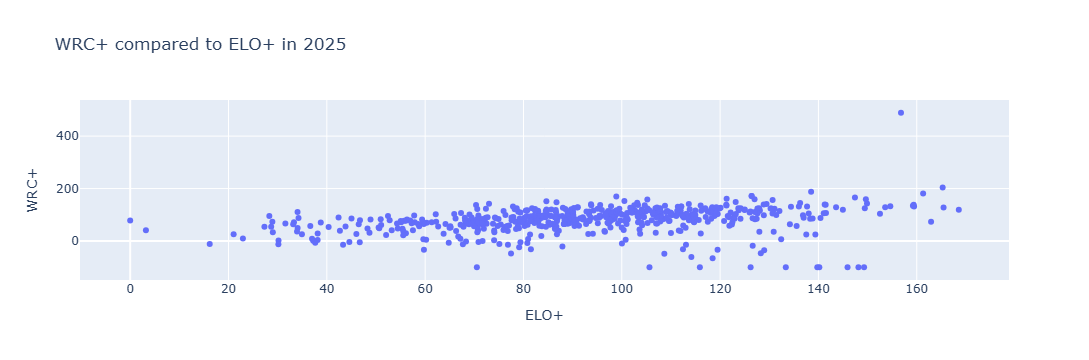

In [2]:
fig = px.scatter(
    batters,
    x='ELO+',
    y='WRC+',
    hover_name='Name',
    title='WRC+ compared to ELO+ in 2025'
)

# Update axis labels
#fig.update_layout(
#    xaxis_title='Strikes called balls (good for hitter)',
#    yaxis_title='Balls called strikes (bad for hitter)'
#)

fig.show()

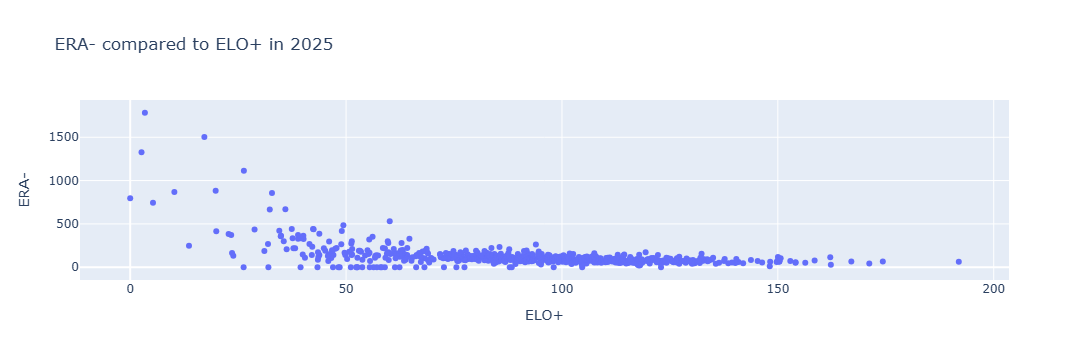

In [3]:
fig2 = px.scatter(
    pitchers,
    x = "ELO+", 
    y="ERA-",
    hover_name="Name",
    title='ERA- compared to ELO+ in 2025'
)

# Update axis labels
#fig2.update_layout(
#    xaxis_title='Strikes called balls (good for hitter)',
#    yaxis_title='Balls called strikes (bad for hitter)'
#)

fig2.show()

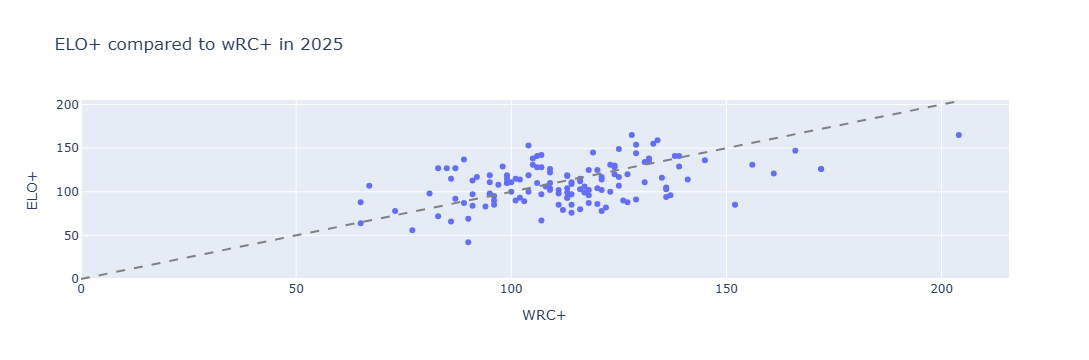

In [20]:
figb = px.scatter(
    batters_q,
    x='WRC+',
    y='ELO+',
    hover_name='Name',
    title='ELO+ compared to wRC+ in 2025'
)
figb.add_shape(
    type="line",
    x0=0, y0=0,
    x1=max(batters_q['WRC+'].max(), batters_q['ELO+'].max()),
    y1=max(batters_q['WRC+'].max(), batters_q['ELO+'].max()),
    line=dict(color="gray", width=2, dash="dash")
)

figb.show()

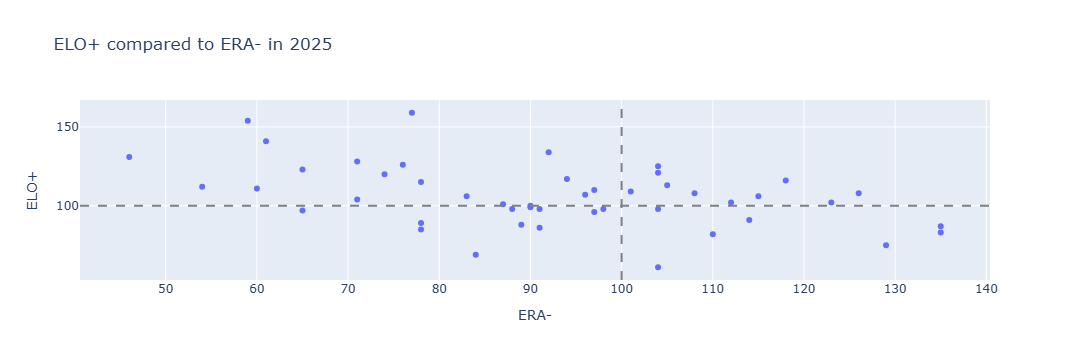

In [21]:
figp = px.scatter(
    pitchers_q,
    x='ERA-',
    y='ELO+',
    hover_name='Name',
    title='ELO+ compared to ERA- in 2025'
)

figp.add_hline(y=100, line_dash="dash", line_color="gray")
figp.add_vline(x=100, line_dash="dash", line_color="gray")


figp.show()